# Covid-19 Data analysis and visualization.

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import pandas as pd
%matplotlib inline

In [44]:
df =pd.read_csv("C:/Users/Rupesh Lokhande/Downloads/covid_19/df_covid19_countries.csv")

In [45]:
df

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,vaccination_ratio,prevalence,incidence
0,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,0.000012,0.000012
1,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,0.000012,0.000000
2,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,0.000012,0.000000
3,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,0.000012,0.000000
4,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,0.000012,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,Zimbabwe,2023-02-17,263642.0,0.0,0.0,5662.0,0.0,0.429,0.0,0.0,0.0,0.0,0.0,16320539.0,0.0,1.615400,0.000000
245721,Zimbabwe,2023-02-18,263642.0,0.0,0.0,5662.0,0.0,0.429,0.0,0.0,0.0,0.0,0.0,16320539.0,0.0,1.615400,0.000000
245722,Zimbabwe,2023-02-19,263642.0,0.0,0.0,5662.0,0.0,0.429,0.0,0.0,0.0,0.0,0.0,16320539.0,0.0,1.615400,0.000000
245723,Zimbabwe,2023-02-20,263642.0,0.0,0.0,5662.0,0.0,0.429,0.0,0.0,0.0,0.0,0.0,16320539.0,0.0,1.615400,0.000000


In [46]:
df.shape

(245725, 17)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   location                 245725 non-null  object 
 1   date                     245725 non-null  object 
 2   total_cases              245725 non-null  float64
 3   new_cases                245725 non-null  float64
 4   new_cases_smoothed       245725 non-null  float64
 5   total_deaths             245725 non-null  float64
 6   new_deaths               245725 non-null  float64
 7   new_deaths_smoothed      245725 non-null  float64
 8   reproduction_rate        245725 non-null  float64
 9   total_vaccinations       245725 non-null  float64
 10  people_vaccinated        245725 non-null  float64
 11  people_fully_vaccinated  245725 non-null  float64
 12  total_boosters           245725 non-null  float64
 13  population               245725 non-null  float64
 14  vacc

In [5]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,vaccination_ratio,prevalence,incidence
count,2.457250e+05,2.457250e+05,245725.000000,2.457250e+05,245725.000000,245725.000000,245725.000000,2.457250e+05,2.457250e+05,2.457250e+05,2.457250e+05,2.457250e+05,245725.000000,245725.000000,245725.000000
mean,1.262001e+06,2.794144e+03,2789.978233,1.756822e+04,27.880269,27.834659,0.680876,2.019124e+07,6.524882e+06,5.476931e+06,1.766295e+06,3.639720e+07,12.451571,7.021943,0.022036
std,5.514956e+06,1.715704e+04,15845.936582,7.246697e+04,193.903385,147.882771,0.525547,1.728260e+08,5.114059e+07,4.473243e+07,1.393745e+07,1.407551e+08,26.347803,12.356165,0.158775
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,-0.070000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000,0.000000,0.000000
25%,2.717000e+03,0.000000e+00,1.571000,2.800000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.242720e+05,0.000000,0.080016,0.000000
50%,3.759100e+04,1.600000e+01,44.286000,5.510000e+02,0.000000,0.286000,0.810000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.336393e+06,0.000000,0.995019,0.000222
75%,4.049700e+05,4.710000e+02,607.000000,6.030000e+03,5.000000,6.429000,1.070000,3.293000e+04,0.000000e+00,0.000000e+00,0.000000e+00,2.620798e+07,0.000000,8.196093,0.007216
max,1.031685e+08,1.354500e+06,806959.857000,1.117820e+06,59895.000000,10364.714000,5.870000,3.491077e+09,1.310292e+09,1.276760e+09,8.269130e+08,1.425887e+09,129.066316,72.212717,32.441022


In [47]:
df.isnull()

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,vaccination_ratio,prevalence,incidence
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
245721,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
245722,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
245723,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [48]:
df

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,vaccination_ratio,prevalence,incidence
0,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,0.000012,0.000012
1,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,0.000012,0.000000
2,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,0.000012,0.000000
3,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,0.000012,0.000000
4,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,0.000012,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,Zimbabwe,2023-02-17,263642.0,0.0,0.0,5662.0,0.0,0.429,0.0,0.0,0.0,0.0,0.0,16320539.0,0.0,1.615400,0.000000
245721,Zimbabwe,2023-02-18,263642.0,0.0,0.0,5662.0,0.0,0.429,0.0,0.0,0.0,0.0,0.0,16320539.0,0.0,1.615400,0.000000
245722,Zimbabwe,2023-02-19,263642.0,0.0,0.0,5662.0,0.0,0.429,0.0,0.0,0.0,0.0,0.0,16320539.0,0.0,1.615400,0.000000
245723,Zimbabwe,2023-02-20,263642.0,0.0,0.0,5662.0,0.0,0.429,0.0,0.0,0.0,0.0,0.0,16320539.0,0.0,1.615400,0.000000


In [ ]:
df.

In [7]:
df.location.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 

# Understanding covid_cases Insights By Countries

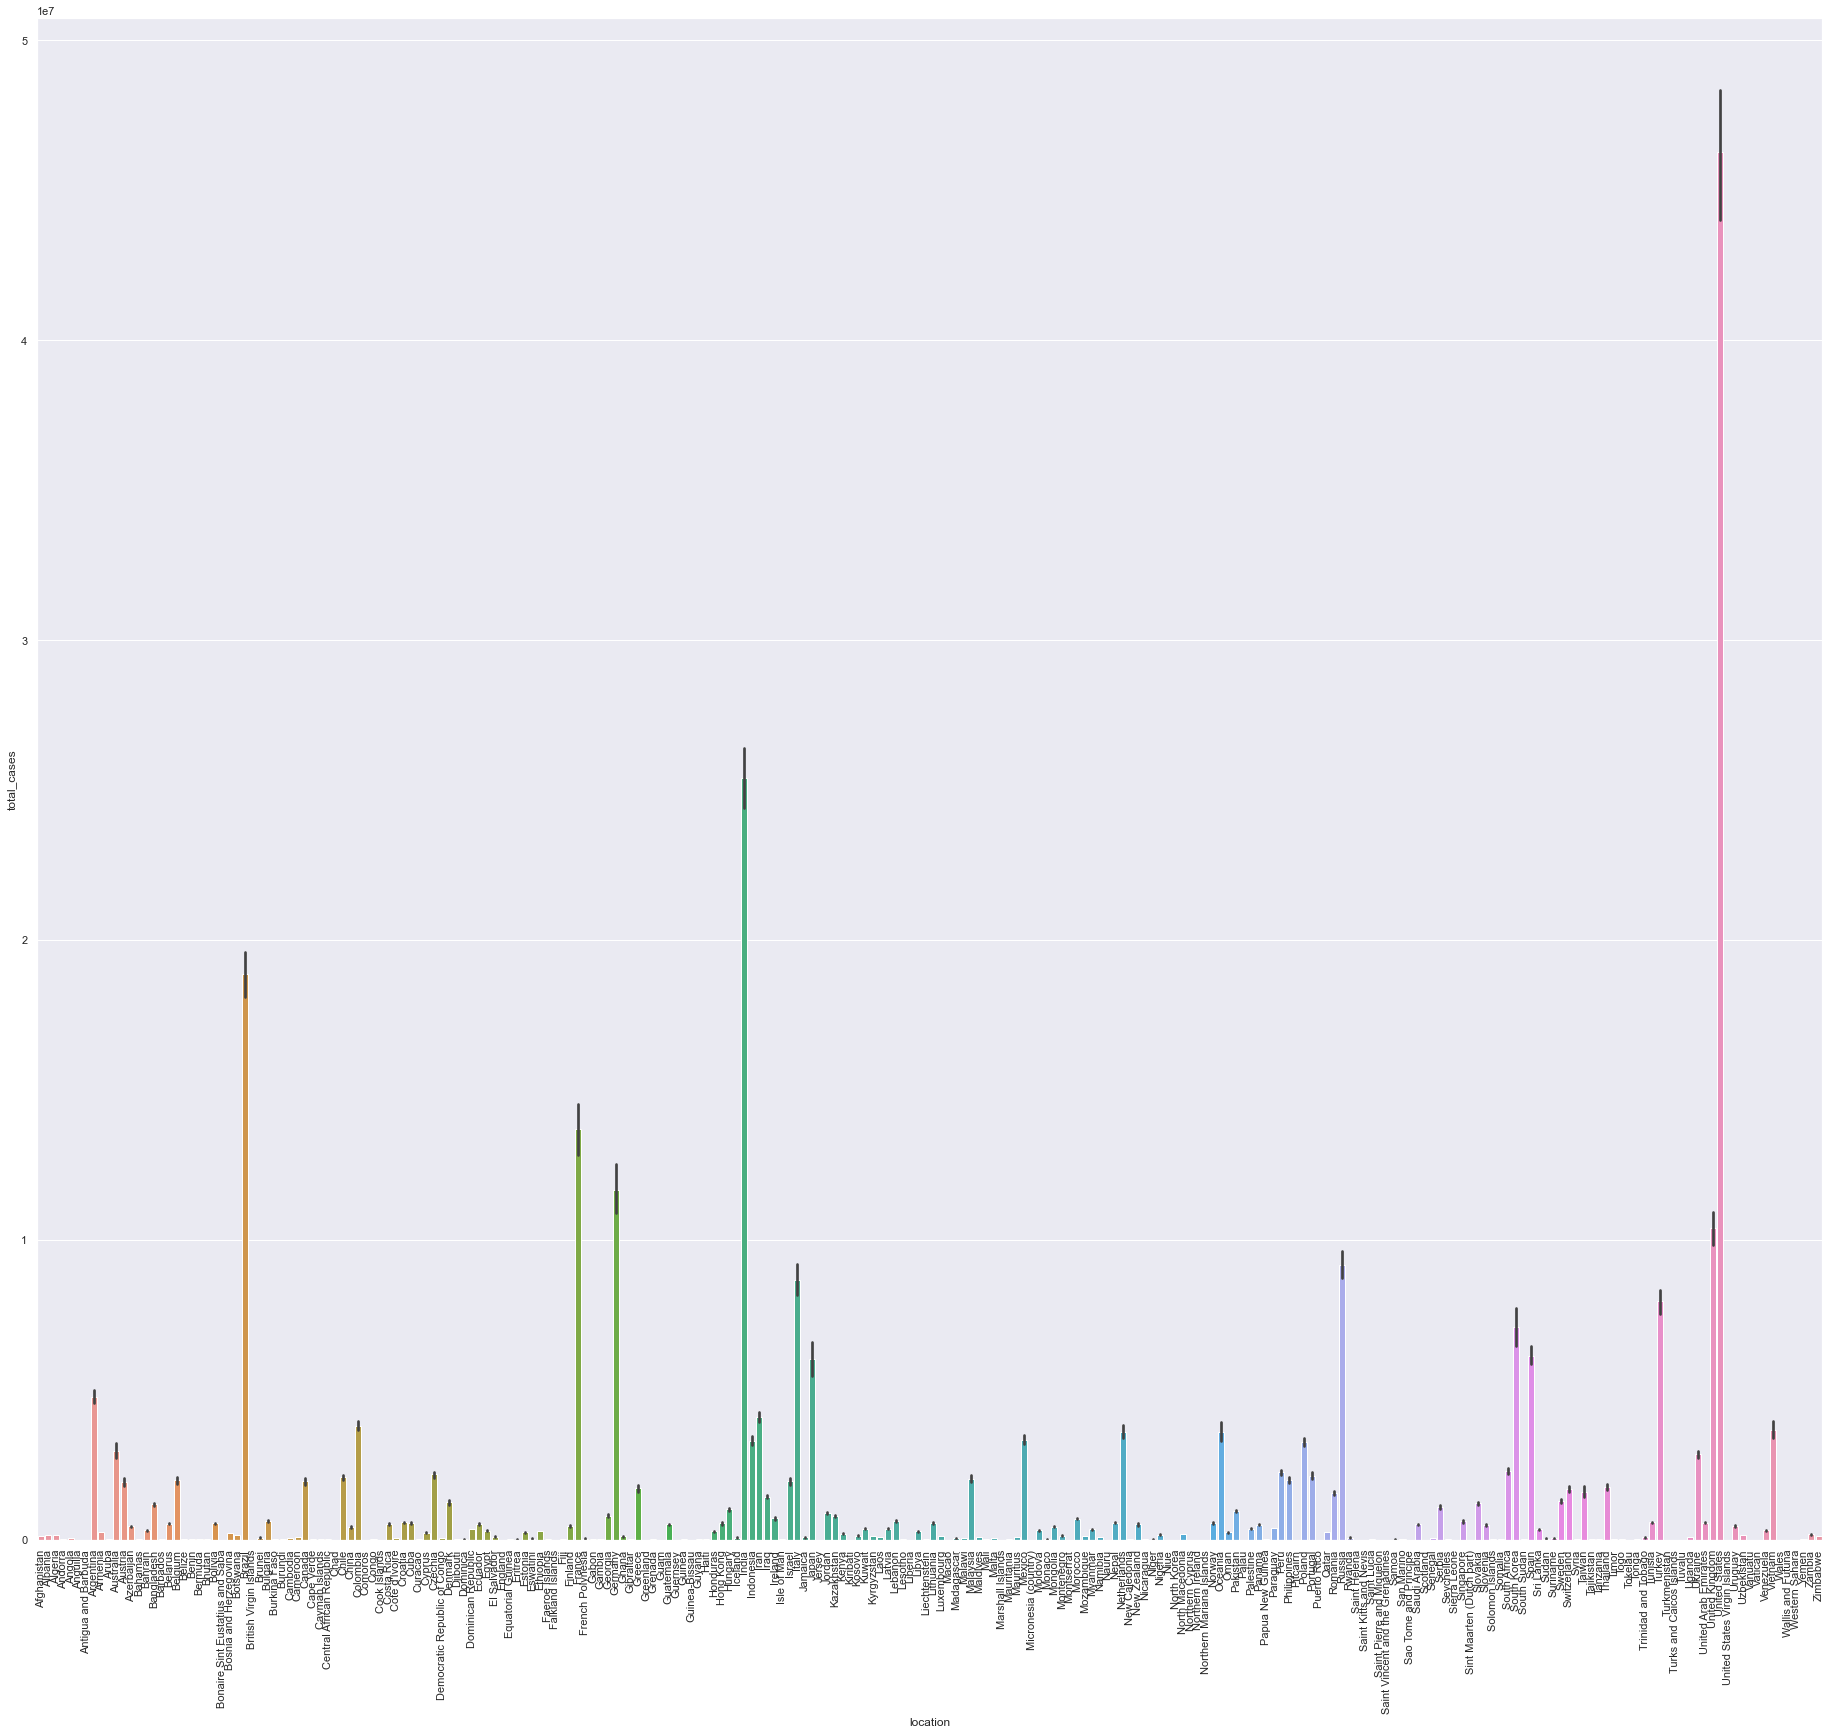

In [8]:
sns.set(rc={'figure.figsize':(32,28)})
plt.xticks(rotation=90)
sns.barplot(x='location', y='total_cases', data=df)
plt.show()

In [9]:
mxt  = df.groupby('location')['total_cases'].max() 

In [10]:
print(mxt)

location
Afghanistan          209181.0
Albania              334336.0
Algeria              271428.0
Andorra               47866.0
Angola               105184.0
                       ...   
Wallis and Futuna      3427.0
Western Sahara            0.0
Yemen                 11945.0
Zambia               342782.0
Zimbabwe             263642.0
Name: total_cases, Length: 236, dtype: float64


In [24]:
mxt

location
Afghanistan          209181.0
Albania              334336.0
Algeria              271428.0
Andorra               47866.0
Angola               105184.0
                       ...   
Wallis and Futuna      3427.0
Western Sahara            0.0
Yemen                 11945.0
Zambia               342782.0
Zimbabwe             263642.0
Name: total_cases, Length: 236, dtype: float64

In [25]:
total_cases_by_country = pd.DataFrame({'location': mxt.index,'total_cases': mxt.values})

In [26]:
total_cases_by_country

,location,total_cases
0,Afghanistan,209181.0
1,Albania,334336.0
2,Algeria,271428.0
3,Andorra,47866.0
4,Angola,105184.0
...,...,...
231,Wallis and Futuna,3427.0
232,Western Sahara,0.0
233,Yemen,11945.0
234,Zambia,342782.0


In [32]:
#sns.set(rc={'figure.figsize':(15,10)}
#plt.xticks(rotation=90)
#sns.lineplot(x='location', y='total_cases', data= df)

In [38]:
top_countries = total_cases_by_country.sort_values(by='total_cases', ascending=False).head(30)

In [39]:
top_countries

,location,total_cases
222,United States,103168534.0
93,India,44686483.0
71,France,39636047.0
76,Germany,38043874.0
27,Brazil,36987682.0
102,Japan,33139504.0
195,South Korea,30458857.0
100,Italy,25547414.0
221,United Kingdom,24341615.0
172,Russia,21878868.0


total_cases_per_10_million_count for all the top 30 most affected Coutries 



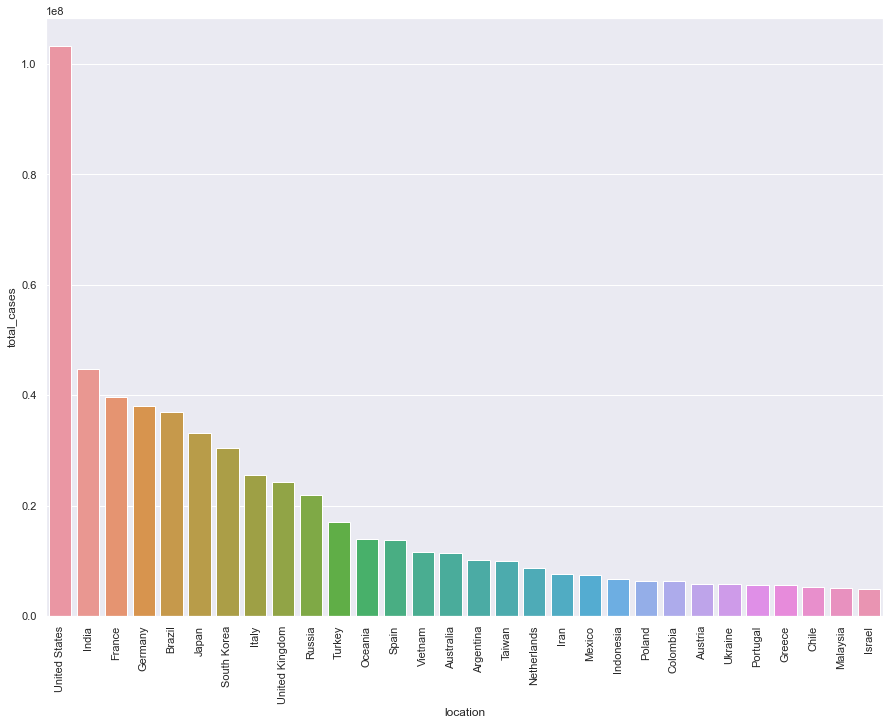

In [109]:
plt.xticks(rotation=90)
sns.barplot(x='location', y='total_cases', data=top_countries)
print("total_cases_per_10_million_count for all the top 30 most affected Coutries ")
print("")

In [40]:
least_countries = total_cases_by_country.sort_values(by='total_cases', ascending=True).head(30)

In [41]:
least_countries

,location,total_cases
154,Northern Mariana Islands,0.0
189,Sint Maarten (Dutch part),0.0
103,Jersey,0.0
183,Scotland,0.0
61,England,0.0
215,Turkmenistan,0.0
149,Niue,0.0
223,United States Virgin Islands,0.0
84,Guernsey,0.0
82,Guam,0.0


total_cases_per_thousand_count for all the top 30 least affected Coutries 



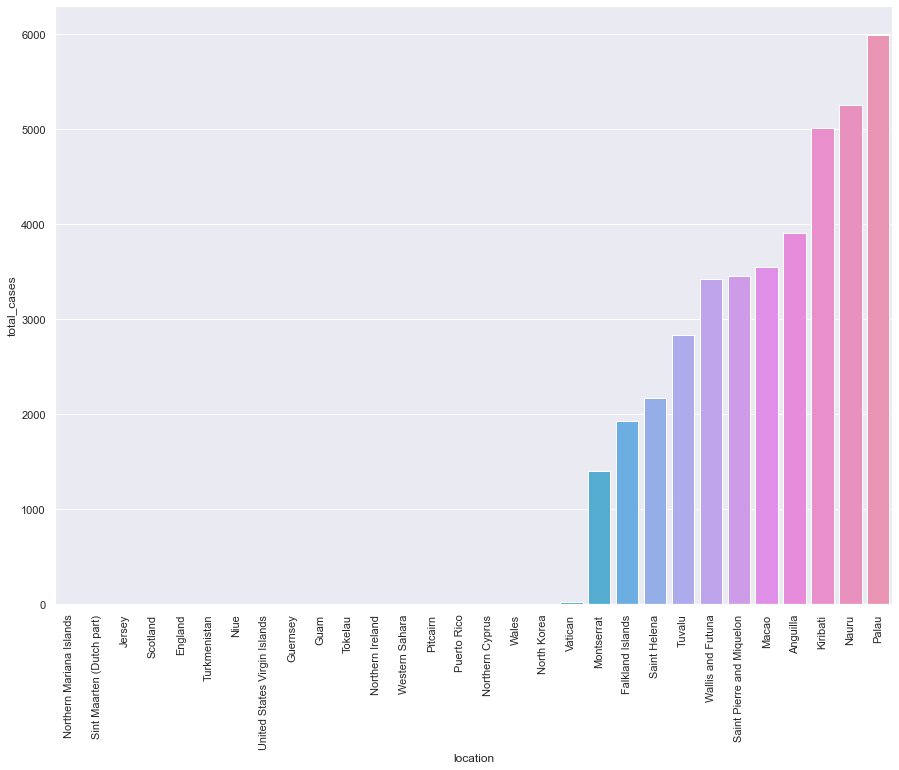

In [22]:
plt.xticks(rotation=90)
sns.barplot(x='location', y='total_cases', data=least_countries)
print("total_cases_per_thousand_count for all the top 30 least affected Coutries ")
print("")

In [42]:
df['date'] = pd.to_datetime(df['date'])

In [127]:
df['year_month'] = df['date'].dt.strftime('%Y-%m')

In [129]:
df_grouped = df.groupby(df['date'].dt.to_period('M')).sum()

In [130]:
df_grouped

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,vaccination_ratio,prevalence,incidence
date,,,,,,,,,,,,,,,
2020-01,3.859500e+04,9379.0,3.875575e+03,891.0,197.0,81.428,29.91,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.407498e+10,0.000000,0.012334,0.002179
2020-02,1.662517e+06,75409.0,7.590660e+04,46941.0,2726.0,2611.149,110.16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.421823e+11,0.000000,0.284090,0.029438
2020-03,8.994902e+06,788514.0,5.883023e+05,415131.0,44291.0,31352.468,2592.02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.257601e+11,0.000000,58.738229,6.272195
2020-04,6.376799e+07,2449172.0,2.400046e+06,4659404.0,205264.0,199413.869,4060.33,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.415879e+11,0.000000,366.403186,10.969691
2020-05,1.454142e+08,2906124.0,2.786646e+06,10434568.0,154990.0,160000.031,4554.63,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.504061e+11,0.000000,684.171444,10.420181
2020-06,2.470655e+08,4317038.0,4.104224e+06,14444961.0,144762.0,144202.855,4937.33,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.423555e+11,0.000000,1022.223295,13.228767
2020-07,4.322687e+08,7128223.0,6.833860e+06,19818114.0,175626.0,169739.688,5313.08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.504340e+11,0.000000,1536.274397,18.168991
2020-08,6.729419e+08,7952415.0,7.988569e+06,25599918.0,184000.0,187968.841,5372.18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.504340e+11,0.000000,2171.299755,22.873248
2020-09,8.964991e+08,8509080.0,8.421192e+06,30053134.0,165079.0,164204.675,5208.34,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.423557e+11,0.000000,2847.141171,28.644205


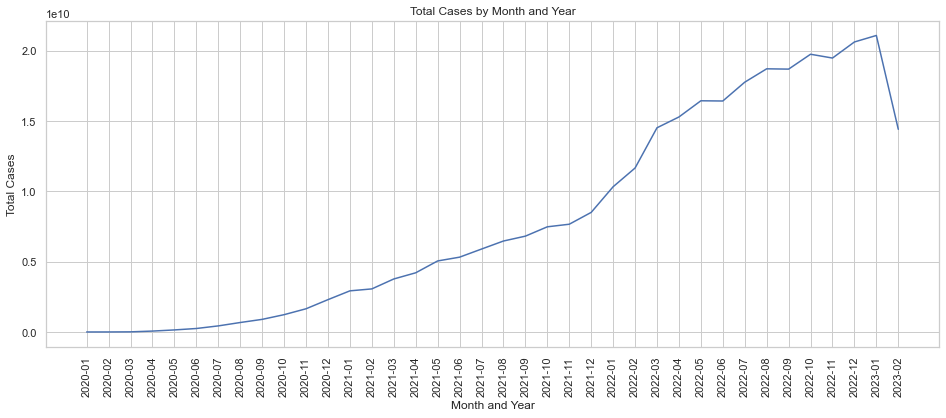

In [133]:
sns.set_style('whitegrid')
plt.figure(figsize=(16, 6))
sns.lineplot(data=df_grouped, x=df_grouped.index.strftime('%Y-%m'), y='total_cases')
plt.xlabel('Month and Year')
plt.ylabel('Total Cases')
plt.title('Total Cases by Month and Year')
plt.xticks(rotation=90)
plt.show()

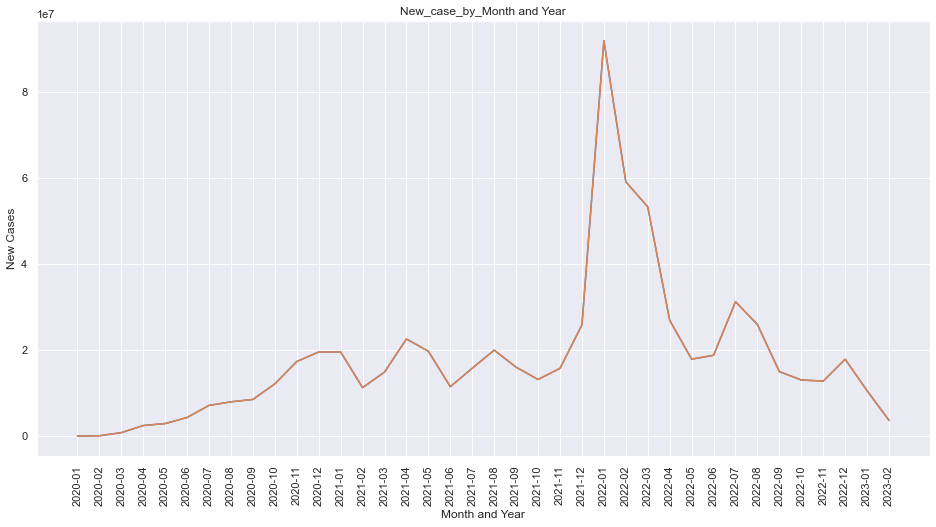

In [145]:
sns.lineplot(data=df_grouped, x=df_grouped.index.strftime('%Y-%m'), y='new_cases')
# set x and y labels
sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("whitegrid")
sns.set_palette("Set1")
sns.set(font_scale=1.5)
sns.set_color_codes("bright")
sns.set(rc={'figure.figsize':(16,8)})
sns.lineplot(data=df_grouped, x=df_grouped.index.strftime('%Y-%m'), y='new_cases')
plt.xlabel('Month and Year')
plt.ylabel('New Cases')
plt.title('New_case_by_Month and Year')
plt.xticks(rotation=90)
plt.show()

# Understanding Death Insights By Countries

In [25]:
top_deaths = df.groupby('location')['total_deaths'].max().reset_index()
top_deaths

,location,total_deaths
0,Afghanistan,7896.0
1,Albania,3596.0
2,Algeria,6881.0
3,Andorra,165.0
4,Angola,1931.0
...,...,...
231,Wallis and Futuna,7.0
232,Western Sahara,0.0
233,Yemen,2159.0
234,Zambia,4055.0


In [26]:
top_30_deaths = top_deaths.sort_values(by='total_deaths', ascending=False).head(30)
top_30_deaths

,location,total_deaths
222,United States,1117820.0
27,Brazil,698050.0
93,India,530762.0
172,Russia,387899.0
130,Mexico,332850.0
164,Peru,219351.0
221,United Kingdom,218405.0
100,Italy,187850.0
76,Germany,167491.0
71,France,164860.0


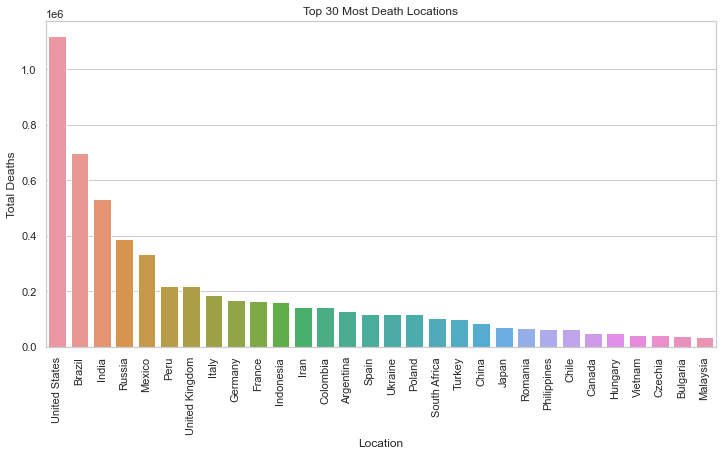

In [27]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="location", y="total_deaths", data=top_30_deaths)
ax.set(ylabel='Total Deaths', xlabel='Location')
plt.title('Top 30 Most Death Locations')
plt.xticks(rotation=90)
plt.show()

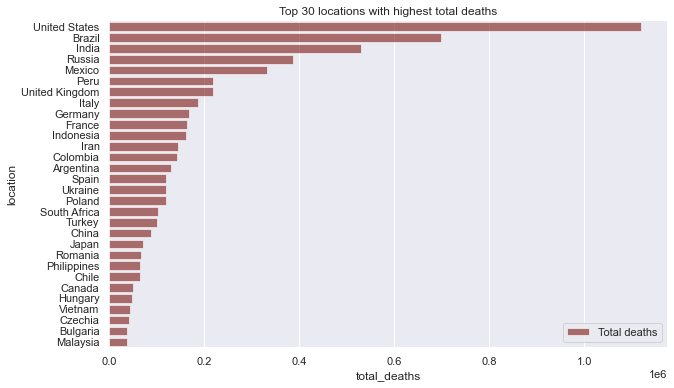

In [28]:
sns.set(rc={'figure.figsize':(11,17)})
plt.figure(figsize=(10, 6))
sns.set_color_codes('dark')
sns.barplot(x='total_deaths', y='location', data=top_30_deaths, color='r', alpha=0.6, label='Total deaths')
sns.despine(left=True, bottom=True)
plt.title('Top 30 locations with highest total deaths')
plt.legend(loc='lower right', frameon=True)
plt.show()

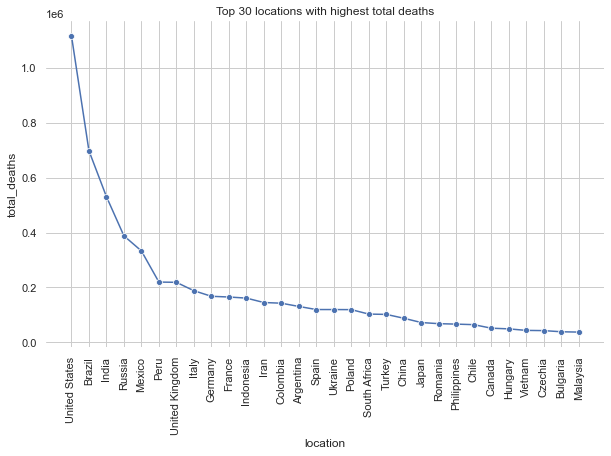

In [29]:
sns.set(rc={'figure.figsize':(20,17)})
sns.lineplot(x='location', y='total_deaths', data=top_30_deaths, marker='o')
sns.despine(left=True, bottom=True)
plt.title('Top 30 locations with highest total deaths')
plt.xticks(rotation=90)
plt.show()

In [30]:
deaths_by_location1 =df.sort_values(by='total_deaths', ascending=False)


In [31]:
top_deaths = deaths_by_location1.head(30)
top_deaths

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,vaccination_ratio,prevalence,incidence
233540,United States,2023-02-21,103168534.0,43889.0,34630.857,1117820.0,257.0,384.714,0.0,0.0,0.0,0.0,0.0,338289856.0,0.000000,30.497082,0.018667
233539,United States,2023-02-20,103124645.0,602.0,35051.143,1117563.0,66.0,411.571,0.0,0.0,0.0,0.0,0.0,338289856.0,0.000000,30.484108,0.000256
233538,United States,2023-02-19,103124043.0,762.0,38044.571,1117497.0,0.0,426.143,0.0,0.0,0.0,0.0,0.0,338289856.0,0.000000,30.483930,0.000324
233537,United States,2023-02-18,103123281.0,2076.0,38291.571,1117497.0,15.0,427.000,0.0,0.0,0.0,0.0,0.0,338289856.0,0.000000,30.483705,0.000883
233536,United States,2023-02-17,103121205.0,48637.0,38606.571,1117482.0,709.0,429.143,0.0,0.0,0.0,0.0,0.0,338289856.0,0.000000,30.483091,0.020682
233535,United States,2023-02-16,103072568.0,59274.0,33488.143,1116773.0,1071.0,342.143,0.0,0.0,0.0,0.0,0.0,338289856.0,0.000000,30.468714,0.025200
233534,United States,2023-02-15,103013294.0,87176.0,36678.143,1115702.0,575.0,325.286,0.0,0.0,0.0,0.0,0.0,338289856.0,0.000000,30.451192,0.037053
233533,United States,2023-02-14,102926118.0,46831.0,36115.714,1115127.0,445.0,394.714,0.0,670987625.0,269332266.0,229914797.0,0.0,338289856.0,79.615827,30.425423,0.019897
233532,United States,2023-02-13,102879287.0,21556.0,35884.286,1114682.0,168.0,397.571,0.0,670978232.0,269330410.0,229913624.0,0.0,338289856.0,79.615278,30.411579,0.009157
233531,United States,2023-02-12,102857731.0,2491.0,36236.143,1114514.0,6.0,400.286,0.0,670932138.0,269322116.0,229908556.0,0.0,338289856.0,79.612826,30.405207,0.001058


In [75]:
new_deaths_by_country = pd.DataFrame({'date': mxt.index,'new_deaths': mxt.values})

In [76]:
new_deaths_by_country['new_deaths'] = new_deaths_by_country['new_deaths'].astype(int)

In [77]:
new_deaths_by_country

,date,new_deaths
0,Afghanistan,209181
1,Albania,334336
2,Algeria,271428
3,Andorra,47866
4,Angola,105184
...,...,...
231,Wallis and Futuna,3427
232,Western Sahara,0
233,Yemen,11945
234,Zambia,342782


In [51]:
df['date'] = pd.to_datetime(df['date'])

In [52]:
df['year_month'] = df['date'].dt.strftime('%Y-%m')

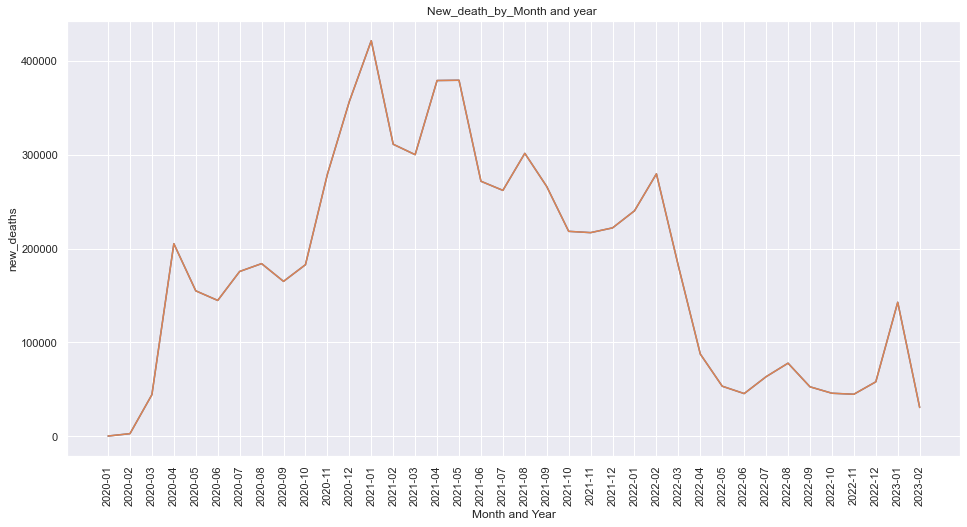

In [135]:
sns.lineplot(x=df_grouped.index.strftime('%Y-%m'), y='new_deaths', data=df_grouped)
sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_palette("Set1")
sns.set(font_scale=1.5)
sns.set_color_codes("dark")
sns.set(rc={'figure.figsize':(16,8)})
sns.lineplot(x=df_grouped.index.strftime('%Y-%m'), y='new_deaths', data=df_grouped)
plt.xlabel('Month and Year')
plt.ylabel('new_deaths')
plt.title('New_death_by_Month and year ')
plt.xticks(rotation=90)
plt.show()

# Understanding Total Vaccinations Insights By Countries

In [158]:
abc = df.groupby('location')['total_vaccinations'].max()

In [192]:
print(abc)

location
Afghanistan          13603457.0
Albania               3058102.0
Algeria              15267442.0
Andorra                156766.0
Angola               23893345.0
                        ...    
Wallis and Futuna       18058.0
Western Sahara              0.0
Yemen                 1242982.0
Zambia               12722857.0
Zimbabwe             12222754.0
Name: total_vaccinations, Length: 236, dtype: float64


In [193]:
total_vaccination_by_country = pd.DataFrame({'location': abc.index,'total_vaccinations': abc.values})

In [186]:
total_vaccination_by_country['total_vaccinations'] = total_vaccination_by_country['total_vaccinations'].astype(int)

In [162]:
total_vaccination_by_country

,location,total_vaccinations
0,Afghanistan,13603457
1,Albania,3058102
2,Algeria,15267442
3,Andorra,156766
4,Angola,23893345
...,...,...
231,Wallis and Futuna,18058
232,Western Sahara,0
233,Yemen,1242982
234,Zambia,12722857


In [163]:
top_countries = total_vaccination_by_country.sort_values(by='total_vaccinations',ascending=False).head(20)

In [176]:
top_countries

,location,total_vaccinations
222,United States,670987625
27,Brazil,484988616
94,Indonesia,444303130
102,Japan,381502580
15,Bangladesh,354528591
158,Pakistan,333510412
229,Vietnam,266211063
130,Mexico,225063079
76,Germany,192081320
172,Russia,185641260


total_vaccinations_per_10_million_count_for all the top 20 countries



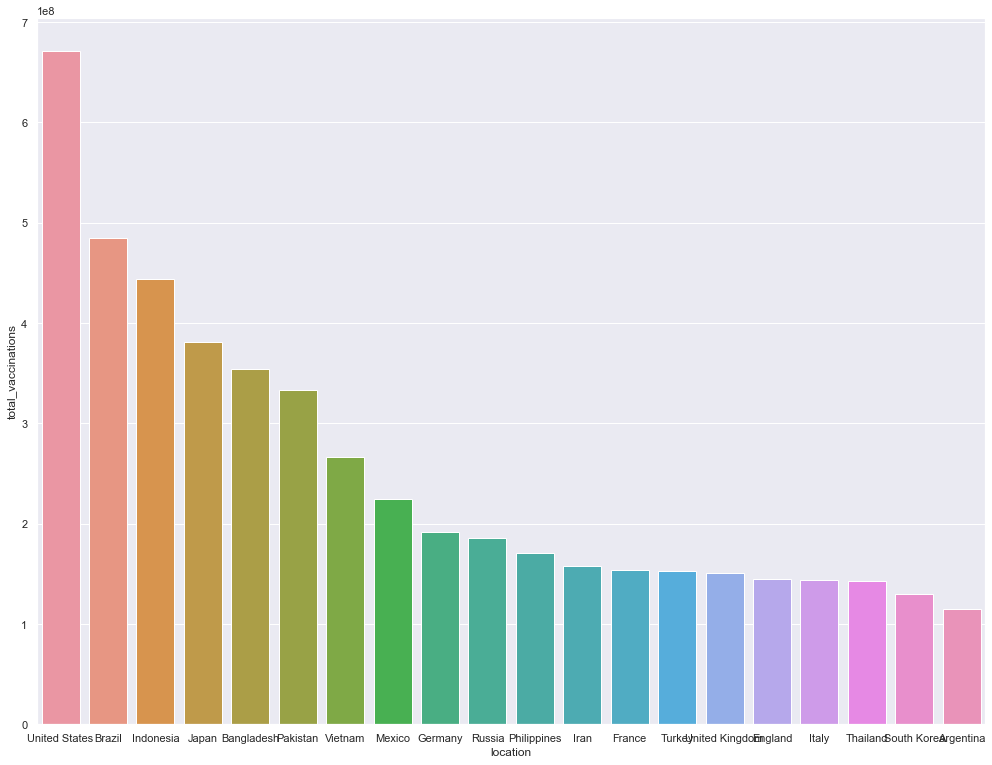

In [177]:
sns.barplot(x='location', y='total_vaccinations',data=top_countries)
print('total_vaccinations_per_10_million_count_for all the top 20 countries')
print("")

# Understanding people_fully_vaccinated Insights By Countries

In [44]:
people_fully_vaccinated_by_country = pd.DataFrame({'location': abc.index,'people_fully_vaccinated': abc.values})

In [45]:
people_fully_vaccinated_by_country['people_fully_vaccinated'] = people_fully_vaccinated_by_country['people_fully_vaccinated'].astype(int)

In [46]:
people_fully_vaccinated_by_country

,location,people_fully_vaccinated
0,Afghanistan,13603457
1,Albania,3058102
2,Algeria,15267442
3,Andorra,156766
4,Angola,23893345
...,...,...
231,Wallis and Futuna,18058
232,Western Sahara,0
233,Yemen,1242982
234,Zambia,12722857


In [47]:
top_countries = people_fully_vaccinated_by_country.sort_values(by='people_fully_vaccinated',ascending=False).head(15)

In [48]:
sns.set(rc={'figure.figsize':(20,17)})

In [78]:
top_countries

,location,people_fully_vaccinated
222,United States,670987625
27,Brazil,484988616
94,Indonesia,444303130
102,Japan,381502580
15,Bangladesh,354528591
158,Pakistan,333510412
229,Vietnam,266211063
130,Mexico,225063079
76,Germany,192081320
172,Russia,185641260


people_fully_vaccinated_10_million_count_for all the top 20 countries



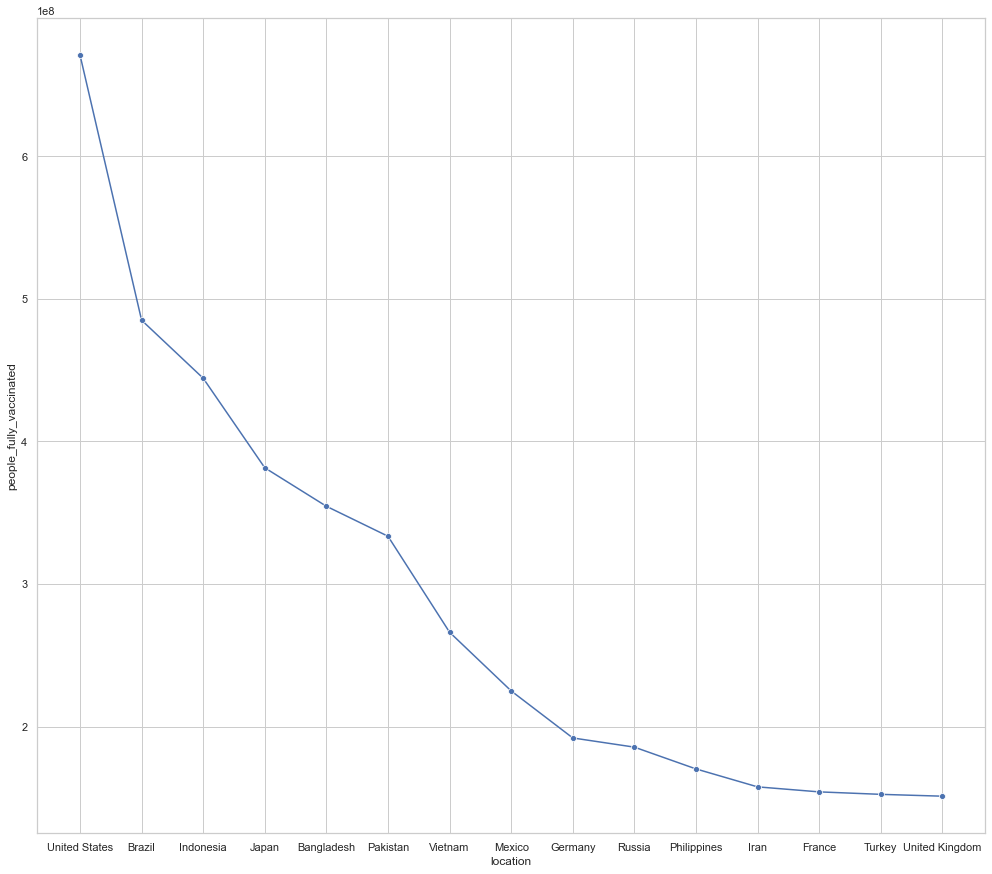

In [55]:
plt.figure(figsize=(17,15))
sns.set_style('whitegrid')
sns.lineplot(x='location', y='people_fully_vaccinated',data=top_countries,marker ='o')
print('people_fully_vaccinated_10_million_count_for all the top 20 countries')
print("")

In [147]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['year_month'] = df['date'].dt.strftime('%Y-%m')

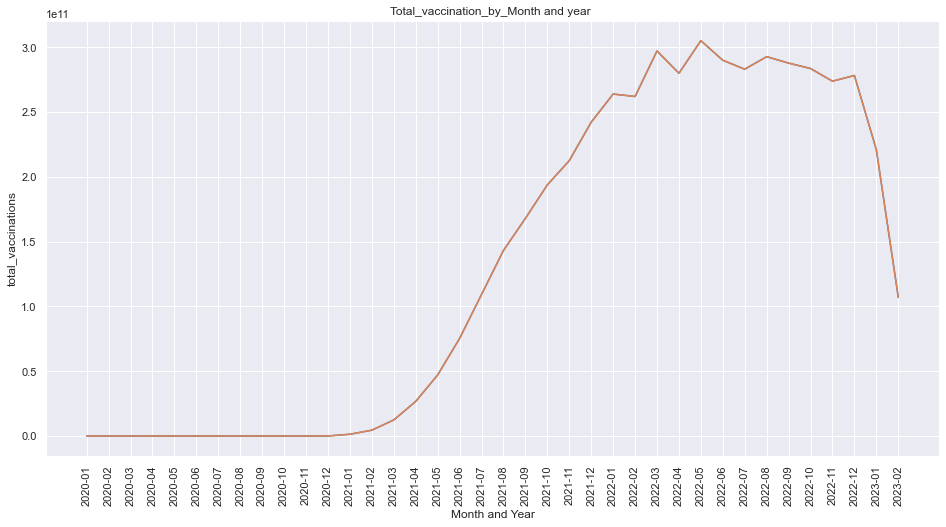

In [148]:
sns.lineplot(x=df_grouped.index.strftime('%Y-%m'), y='total_vaccinations', data=df_grouped)
sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_palette("Set1")
sns.set(font_scale=1.5)
sns.set_color_codes("dark")
sns.set(rc={'figure.figsize':(16,8)})
sns.lineplot(x=df_grouped.index.strftime('%Y-%m'), y='total_vaccinations', data=df_grouped)
plt.xlabel('Month and Year')
plt.ylabel('total_vaccinations')
plt.title('Total_vaccination_by_Month and year ')
plt.xticks(rotation=90)
plt.show()

In [151]:
df['date'] = pd.to_datetime(df['date'])

In [152]:
df['year_month'] = df['date'].dt.strftime('%Y-%m')

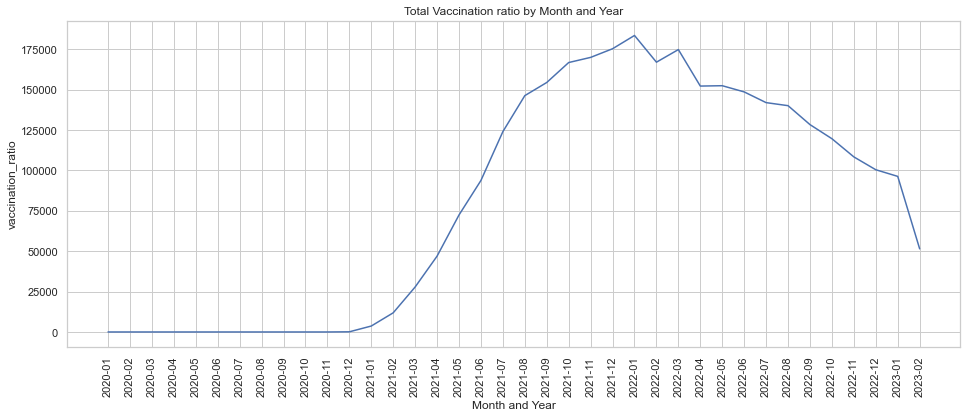

In [156]:
sns.set_style('whitegrid')
plt.figure(figsize=(16, 6))
sns.lineplot(data=df_grouped, x=df_grouped.index.strftime('%Y-%m'), y='vaccination_ratio')
plt.xlabel('Month and Year')
plt.ylabel('vaccination_ratio')
plt.title('Total Vaccination ratio by Month and Year')
plt.xticks(rotation=90)
plt.show()

# Analysis of Country data on COVID-19


-It is a complete world data set with more than 2 lakh rows and 17 coloumns. It has 236 countries and have information about
 the entire covid-19 in that country like total covid-19 cases, total covid-19 deaths, total covid_19 vaccination etc...
 First of all, While analyzing the countries total cases,top 30 countries with highest number of cases and top 30 countrie
 which were least affected are identified.
-it will identify the total number of covid-19 cases according to month and year.
-it can be seen that till April-2020 there was increase in covid cases but from December-2021 to October-2022 there was a rapid
 increase. After that new cases as per month and year were identified in the same way.
-After that it has been analysed the total number of deaths as per countries and identified the top 30 countries with higest
 number of deaths.
-Then the number of vaccination done according to the countries was identified. Among them, The top 20 countries were
 identified in which highest vaccination was done. The United State is the first position and Argentina 20th position.
-It is identified that how many people are fully vaccinated according to the country as well as according to month and year 
 the vaccination raito is calculated as per month and year 
